# THỐNG KÊ MÔ TẢ - Bài tập thực hành 2 

Thực hiện thống kê mô tả trên tập dữ liệu về bệnh tiểu đường. Dữ liệu lấy tại https://www.kaggle.com/code/vincentlugat/pima-indians-diabetes-eda-prediction-0-906 

In [ ]:
pip install plotly


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 1. Nạp thư viện

In [1]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

# 2. Tải dữ liệu

In [2]:

data = pd.read_csv('diabetes.csv')
display(data.info(),data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 3. Kiểm tra dữ liệu

In [3]:
# Kiểm tra số giá trị bằng 0 (Missing value giả định)
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
print("\nSố lượng giá trị = 0 ở các cột nghi ngờ:")
print((data[cols_with_zero] == 0).sum())

#Tỷ lệ missing giả định
print("\n--- Tỷ lệ giá trị 0 (giả missing) theo phần trăm ---")
print(((data[cols_with_zero] == 0).sum() / len(data) * 100).round(2))


#Kiểm tra giá trị bị thiếu NaN
print("\nSố giá trị bị thiếu (NaN) từng cột:")
print(data.isnull().sum())


Số lượng giá trị = 0 ở các cột nghi ngờ:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

--- Tỷ lệ giá trị 0 (giả missing) theo phần trăm ---
Glucose           0.65
BloodPressure     4.56
SkinThickness    29.56
Insulin          48.70
BMI               1.43
dtype: float64

Số giá trị bị thiếu (NaN) từng cột:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### 4. Xử lí dữ liệu

In [4]:
#Thay giá trị 0 trong các cột nghi ngờ bằng giá trị trung vị (median)
for col in cols_with_zero:
    median_val = data[col][data[col] > 0].median()
    data[col] = data[col].replace(0, median_val)


print("\n Đã xử lý giá trị 0 (thay bằng median của từng biến).")
print(data[cols_with_zero].head())


 Đã xử lý giá trị 0 (thay bằng median của từng biến).
   Glucose  BloodPressure  SkinThickness  Insulin   BMI
0      148             72             35      125  33.6
1       85             66             29      125  26.6
2      183             64             29      125  23.3
3       89             66             23       94  28.1
4      137             40             35      168  43.1


In [5]:
!pip install dataframe-image
!pip install "kaleido>=0.2.1"
!pip install dataframe-image kaleido plotly


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


### Thống kê mô tả

In [7]:
import dataframe_image as dfi
from IPython.display import FileLink

# Tính thống kê mô tả
desc = data.describe().T

# Thêm cột median
desc["median"] = data.median()

# Sắp xếp để median nằm sau mean
cols = list(desc.columns)
cols.insert(cols.index("mean") + 1, cols.pop(cols.index("median")))
desc = desc[cols]

# Tạo bảng có màu
styled = desc.style.background_gradient(cmap="Oranges")

# 👉 Hiển thị bảng trực tiếp trong notebook
display(styled)



,count,mean,median,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.000000,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.000000,121.656250,117.000000,30.438286,44.000000,99.750000,117.000000,140.250000,199.000000
BloodPressure,768.000000,72.386719,72.000000,12.096642,24.000000,64.000000,72.000000,80.000000,122.000000
SkinThickness,768.000000,29.108073,29.000000,8.791221,7.000000,25.000000,29.000000,32.000000,99.000000
Insulin,768.000000,140.671875,125.000000,86.383060,14.000000,121.500000,125.000000,127.250000,846.000000
BMI,768.000000,32.455208,32.300000,6.875177,18.200000,27.500000,32.300000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.372500,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,29.000000,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.000000,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


# XỬ LÝ VÀ TRỰC QUAN HÓA DỮ LIỆU -Bài tập thực hành 2

Thực hiện trực quan hóa dữ liệu trên tập dữ liệu về bệnh tiểu đường. Dữ liệu lấy tại https://www.kaggle.com/code/vincentlugat/pima-indians-diabetes-eda-prediction-0-906 

### 1. Trực quan biến Outcome

In [21]:

# Chia dữ liệu
D = data[data['Outcome'] != 0]   # bệnh
H = data[data['Outcome'] == 0]   # khỏe

# Tạo figure 2 biểu đồ cạnh nhau
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Count of Outcome variable", "Distribution of Outcome variable"),
    specs=[[{"type": "bar"}, {"type": "pie"}]]
)

# --- Biểu đồ 1: COUNT ---
trace1 = go.Bar(
    x=data['Outcome'].value_counts().values.tolist(),
    y=['Healthy', 'Diabetic'],
    orientation='h',
    text=data['Outcome'].value_counts().values.tolist(),
    textfont=dict(size=14),
    textposition='auto',
    marker=dict(
        color=['lightskyblue', 'lightcoral'],  # Healthy = xanh, Diabetic = đỏ nhạt
        line=dict(color='#000000', width=1.5)
    ),
    opacity=0.85,
    name="Count"
)
fig.add_trace(trace1, row=1, col=1)

# --- Biểu đồ 2: PIE ---
trace2 = go.Pie(
    labels=['Healthy', 'Diabetic'],
    values=data['Outcome'].value_counts(),
    textfont=dict(size=14),
    marker=dict(
        colors=['lightskyblue', 'lightcoral'],  # Giữ cùng bảng màu
        line=dict(color='#000000', width=1.5)
    ),
    textinfo='label+percent',
    opacity=0.9,
    name="Percentage"
)
fig.add_trace(trace2, row=1, col=2)

# --- Layout chung ---
fig.update_layout(
    title_text="Outcome Variable Visualization",
    title_x=0.5,
    showlegend=False,
    width=900,
    height=400
)

fig.show()


### 2. Phân phối tất cả các biến 

In [22]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

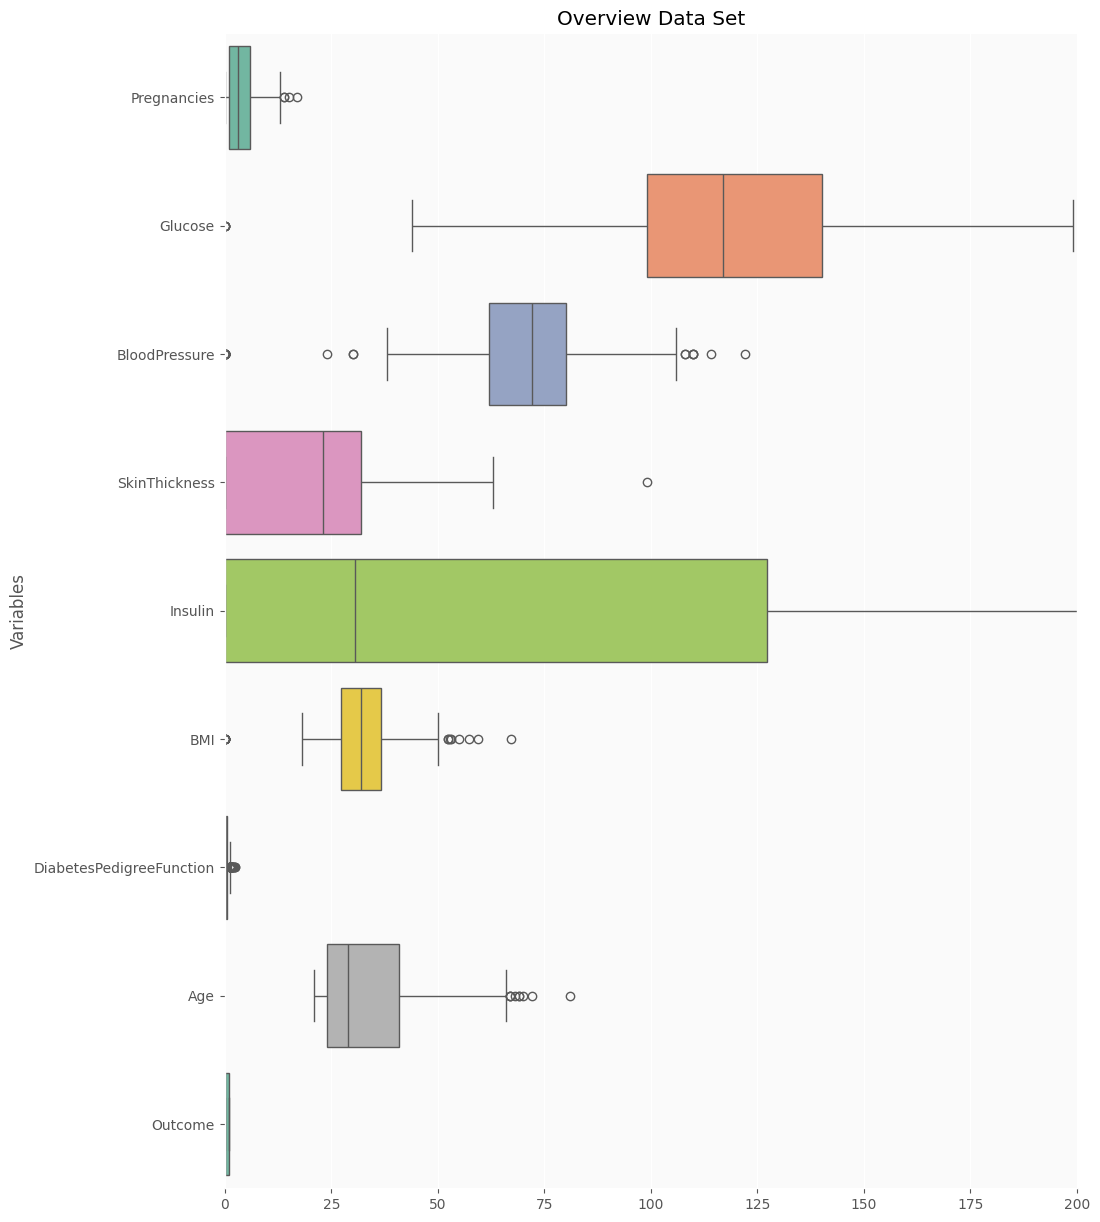

In [13]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data, 
  orient = 'h', 
  palette = 'Set2')